In [101]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Going to start with US Average for all airports

In [102]:
df = pd.read_excel("https://github.com/Xanitross/Airfare_Over_Five_Years/blob/main/Quarterly%20national%20level%20domestic%20average%20fare%20series%203Q%202022.xlsx?raw=true")
df

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,1,296.895553,583.331540
1,1995,2,296.462724,577.378360
2,1995,3,287.514840,557.509831
3,1995,4,287.776292,555.352662
4,1996,1,283.969692,543.056921
...,...,...,...,...
106,2021,3,314.072974,340.233606
107,2021,4,327.137133,349.087623
108,2022,1,328.493121,342.708959
109,2022,2,397.160594,402.381914


Format Quarter

In [103]:
df["Quarter"] = "Q" + df["Quarter"].astype(str)
df

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
0,1995,Q1,296.895553,583.331540
1,1995,Q2,296.462724,577.378360
2,1995,Q3,287.514840,557.509831
3,1995,Q4,287.776292,555.352662
4,1996,Q1,283.969692,543.056921
...,...,...,...,...
106,2021,Q3,314.072974,340.233606
107,2021,Q4,327.137133,349.087623
108,2022,Q1,328.493121,342.708959
109,2022,Q2,397.160594,402.381914


Combine Quarter + Year and then set that as the index for the data

In [104]:
df["Year"] = df["Year"].astype(str) + " " + df["Quarter"].astype(str)
df.drop("Quarter", inplace=True, axis=1)
df.set_index("Year", inplace=True)
df

,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $)
Year,,
1995 Q1,296.895553,583.331540
1995 Q2,296.462724,577.378360
1995 Q3,287.514840,557.509831
1995 Q4,287.776292,555.352662
1996 Q1,283.969692,543.056921
...,...,...
2021 Q3,314.072974,340.233606
2021 Q4,327.137133,349.087623
2022 Q1,328.493121,342.708959


In [105]:
#df["U.S. Average (Current $) "] = ['${:,.2f}'.format(i) for i in list(df["U.S. Average (Current $) "])]
#df["U.S. Average (Inflation-Adjusted $) "] = ['${:,.2f}'.format(i) for i in list(df["U.S. Average (Inflation-Adjusted $) "])]
#df

Graph of cost over time

<Axes: xlabel='Year'>

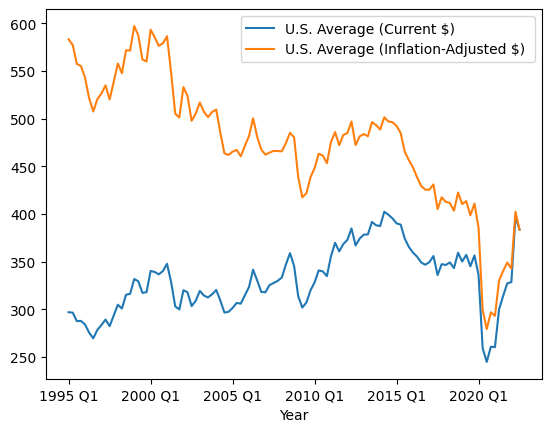

In [106]:
df.plot.line()

We now want to look at a detailed breakdown of the dip at the end of the graph by going in depth on the pricing data over the last 5 years. Going forward we will only be using the inflation-adjusted $ values, as they will give us the most accurate picture.

In [122]:
Q = 3
Y = 2022
df = pd.read_excel("AverageFare_Q"+str(Q)+"_"+str(Y)+".xlsx", skiprows=1, nrows=10)
df["Year"] = str(Y) + " Q" + str(Q)
Q -= 1
df


,2021 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2022),2021 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,426.370553,426.370553,981228,2022 Q3
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,375.372806,375.372806,795315,2022 Q3
2,3,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,400.909769,400.909769,768501,2022 Q3
3,4,DEN,Denver International,Denver,CO,345.529835,345.529835,739773,2022 Q3
4,5,EWR,Newark Liberty International,Newark,NJ,420.193271,420.193271,652199,2022 Q3
5,6,SEA,Seattle/Tacoma International,Seattle,WA,425.529656,425.529656,647461,2022 Q3
6,7,DFW,Dallas/Fort Worth International,Dallas-DFW,TX,431.892402,431.892402,631155,2022 Q3
7,8,PHX,Phoenix Sky Harbor International,Phoenix,AZ,371.796672,371.796672,592829,2022 Q3
8,9,MCO,Orlando International,Orlando,FL,275.699251,275.699251,585781,2022 Q3
9,10,BOS,Logan International,Boston,MA,384.687948,384.687948,569471,2022 Q3


Add additional data to the Datafram

In [123]:
while Y > 2017:
    df1 = pd.read_excel("AverageFare_Q"+str(Q)+"_"+str(Y)+".xlsx", skiprows=1, nrows=10)
    df1["Year"] = str(Y) + " Q" + str(Q)
    df = df.merge(df1, how="outer")
    Q -= 1
    if Q == 0:
        Q = 4
        Y -= 1
df

,2021 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2022),2021 Passengers (10% sample),Year
0,1,LAX,Los Angeles International,Los Angeles,CA,426.370553,426.370553,981228,2022 Q3
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,375.372806,375.372806,795315,2022 Q3
2,3,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,400.909769,400.909769,768501,2022 Q3
3,4,DEN,Denver International,Denver,CO,345.529835,345.529835,739773,2022 Q3
4,5,EWR,Newark Liberty International,Newark,NJ,420.193271,420.193271,652199,2022 Q3
...,...,...,...,...,...,...,...,...,...
185,6,SEA,Seattle/Tacoma International,Seattle,WA,331.841471,395.346922,647461,2018 Q1
186,7,DFW,Dallas/Fort Worth International,Dallas-DFW,TX,381.156748,454.099806,631155,2018 Q1
187,8,PHX,Phoenix Sky Harbor International,Phoenix,AZ,320.866685,382.271860,592829,2018 Q1
188,9,MCO,Orlando International,Orlando,FL,246.680099,293.887975,585781,2018 Q1
